# Regresion Lineal
## Introducción

La regresión lineal múltiple permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta ($Y$) se determina a partir de un conjunto de variables independientes llamadas predictores ($X_{1}$, $X_{2}$, $X_{3}$, $\cdots$). Es una extensión de la regresión lineal simple, por lo que es fundamental comprender esta última. Los modelos de regresión múltiple pueden emplearse para predecir el valor de la variable dependiente o para evaluar la influencia que tienen los predictores sobre ella (esto último se debe que analizar con cautela para no malinterpretar causa-efecto).

Los modelos lineales múltiples siguen la siguiente ecuación:

\begin{equation}
Y_{i}=(β_{0}+β_{1}X_{1i}+β_{2}X_{2i}+\cdots+β_{n}X_{ni})+e_{i}
\end{equation}

donde

1. $β_{0}$: es la ordenada en el origen, el valor de la variable dependiente Y cuando todos los predictores son cero.
2. $β_{i}$: es el efecto promedio que tiene el incremento en una unidad de la variable predictora $X_{i}$ sobre la variable dependiente $Y$, manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.
3. $e_{i}$: es el error, la diferencia entre el valor observado y el estimado por el modelo.


## Historia
La primera forma de regresión lineal documentada fue el método de los mínimos cuadrados que fue publicada por Legendre en 1805, Gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,​ y en dónde se incluía una versión del teorema de Gauss-Márkov.

### Algunas notas históricas sobre la formación de las nociones de correlación y regresión

La formación de las nociones de correlación y regresión proviene, en gran parte, de estudios realizados en Biología, Biometría y Eugenesia. El primer autor que se interesa en el tema fue LambertAdolphe-Jacques Quetelet (1796-1874), conocido como Adolphe Quetelet, nacido en Gante, Bélgica.

Obtuvo su doctorado en Matemáticas con una tesis sobre secciones cónicas, llegando a ser director del observatorio astronómico de Bruselas. Fue un hombre de gran energía, entusiasmo y talento organizativo que utilizó para crear varias instituciones internacionales.

Sus aportaciones sobre la correlación y regresión se originan desde sus estudios sobre el hombremedio, estimando empíricamente las medias y desviaciones típicas de medidas antropométricas que, suponía, dependen de varias variables independientes tales como el sexo, edad, profesión o nivel de educación. En sus estudios relaciona dos o más variables, por ejemplo llega a obtener una ecuación de una hipérbola que relaciona la edad y la altura de las personas entre cero y 30 años (Hald, 1998). Su originalidad no consistió en haber calculado las medias de las magnitudes antropométricas, sino haber considerado su dispersión y descubierto que la ley normal (bien conocida en Astronomía) ofrecía una descripción aceptable de tal variabilidad, por lo que utilizó esta distribución como ajuste a sus medidas antropométricas, introduciéndola en Biometría (Seal, 1967).

Augusto Bravais (1811-1863) contribuye al desarrollo de esta teoría desde otro campo: la astronomía, al estudiar los errores en las medidas de las coordenadas de cuerpos espaciales. Fue él quien utilizó por primera vez el término correlación en un estudio presentado en 1846 en la Academia de Ciencias en Francia (Seal, 1967). Sin embargo Pearson (1965) indicará que Bravais, al estudiar la teoría de errores, no consideraba variables aleatorias correlacionadas, sino consideraba errores independientes unos de otros; por tanto, no llegó a una verdadera idea de la correlación, tal como hoy la conocemos.

Un avance en el desarrollo de estos conceptos se produce mediante el estudio conjunto de la variación de dos medias realizado por Francis Galton (1822-1911). Según Hald (1998), Galton era hijo de un banquero de Birmingham y se casó con una prima de Charles Darwin, por lo que se interesó por sus estudios sobre la herencia. Estudió Medicina y Matemáticas en Londres y Cambridge, dedicando una primera parte de su vida a estudios geográficos y meteorológicos, llegando a tener un papel destacado en los mapas del tiempo diarios del periódico “The Times”. Tenía una destacada facilidad para construir artificios mecánicos, habilidad que utilizó para construir sofisticados aparatos de medida. Tuvo obsesivo interés por medir, hacer recuentos y gráficos de fenómenos de antropología, biología, genética, sociología y psicología. A lo largo del periodo 1865-1890, su principal interés fueron los estudios empíricos de las leyes de la herencia por medio de métodos estadísticos.

Desde el punto de vista de la Estadística matemática se puede considerar a Galton como un ingenioso amateur, ya que, sin conocer los refinados métodos estadísticos de la época (usados, por ejemplo, por Laplace y Gauss) y por medio de investigaciones empíricas, estudia la variabilidad de características humanas. Desarrolla sus propios y rudimentarios métodos para describir observaciones univariadas y bivariadas normalmente distribuidas, explicando la utilidad y el significado de la regresión y correlación, no solamente en el contexto de la herencia, sino en general. Galton no conocía la literatura estadística germana y para ajustar una distribución normal a sus datos utiliza el método de Quetelet, muy simple desde el punto de vista numérico, ya que, requiere solamente el cálculo de frecuencias relativas y la interpolación en la tabla de la binomial acumulativa. Como no domina con soltura la matemática de su tiempo utiliza artificios mecánicos para “probar” las propiedades de la distribución binomial como el que llamó “quincux”, hoy conocido como aparato de Galton.  

## Planteamiento del algoritmo

### Aplicación

In [32]:
# Importar las librerías 
#========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar el dataset de entranamiento
#========================================================
dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')
X = dataset.iloc[:len(dataset), 1].values
X = X.reshape(-1,1)
X = np.insert(X, 0, 1, axis = 1)
y = dataset.iloc[:len(dataset), -1].values.reshape(-1,1)

# Seleccionar conjunto de training y test
#========================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)


# Escalado de las variables
#========================================================
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)
st_y = StandardScaler()
y_train = st_y.fit_transform(y_train).reshape(-1)
y_test = st_y.transform(y_test).reshape(-1)

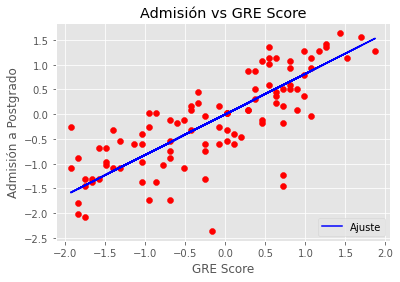

In [31]:
# Aplicación del modelo con librería de sklearn
#========================================================
from sklearn.linear_model import LinearRegression
regression_py = LinearRegression() 
regression_py.fit(X_train, y_train)
y_predict_py = regression_py.predict(X_test) 

# Gráfica de regresión conjunto de test
#========================================================
plt.scatter(X_test[:,1], y_test, color = "red") 
plt.plot(X_test[:,1], y_predict_py, color = "blue")
plt.legend(('Ajuste',),
            loc='lower right')
plt.title("Admisión vs GRE Score")
plt.xlabel("GRE Score")
plt.ylabel("Admisión a Postgrado")
plt.show()

## Conclusiones

El análisis de regresión constituyen un método que se emplean para conocer las relaciones y significación entre series de datos. Lo anterior, es de suma importancia para la industria ya que es aquí en donde se presentan variables de respuesta e independientes las cuales interactúan para originar las características de un proceso en particular y por ende; analizar, predecir valores de la variable dependiente y examinar el grado de fuerza con que se relacionan dichas variables. 